# Sprawozdanie MRO Lab 3
## Wykonanie Patryk Sładek
### Zad 1 Płaszczyzna separująca o maksymalnym marginesie

In [11]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs


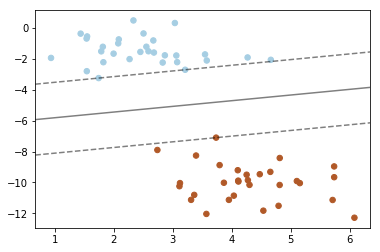

In [6]:
# we create 40 separable points
X, y = make_blobs(n_samples=60, centers=2)

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none')
plt.show()

### Zad 2 Klasyfikacja - trzy klasy

In [4]:
from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import numpy as np
from matplotlib import pyplot as plt

In [21]:
iris_data, iris_target  = datasets.load_iris(True)
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_target, test_size=.33)
classifiers = [svm.SVC(kernel='linear'),
               KNeighborsClassifier(),
              svm.SVC(kernel='rbf'),
              svm.SVC(kernel='poly')]
for classifier in classifiers:
    classifier.fit(X_train,y_train)
    print(classifier)
    print(classification_report(y_test,classifier.predict(X_test)))



SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       0.94      0.94      0.94        17
          2       0.94      0.94      0.94        17

avg / total       0.96      0.96      0.96        50

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       0.94      0.88      0.91        17
          2       0.89      0.94      0.91        17

avg / total       0.94      0.94      0.94        50

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_func

Z powyższych wyników widać, że  najsłabsze wyniki są dla modelu "poly". Nieco lepiej poradził sobie 1-NN. Dla "rbf" i "linear" mamy najlepsze rezultaty. Zatem wprowadzenie modelu nieliniowego nie poprawiło klasyfikacji w tym przypadku.

In [36]:
def make_meshgrid(xlim, ylim, h=.02):
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    x_min, x_max = xx.min() - 1, xx.max() + 1
    y_min, y_max = yy.min() - 1, yy.max() + 1
    return np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    

In [66]:
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, **params)

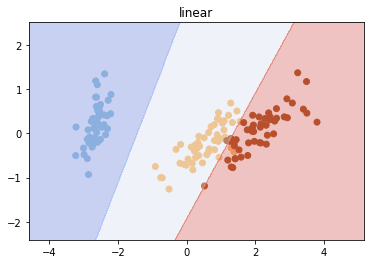

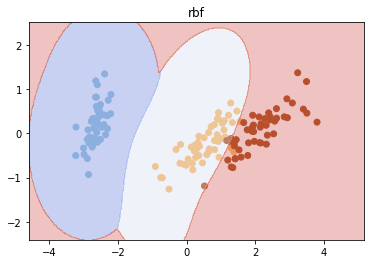

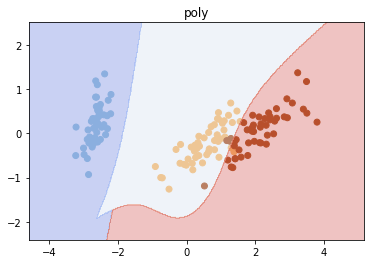

In [83]:
pca = PCA(n_components = 2)
X_r = pca.fit_transform(iris_data)
clfs=[svm.SVC(kernel='linear').fit(X_r,iris_target),
      svm.SVC(kernel='rbf', gamma=0.7).fit(X_r,iris_target),
      svm.SVC(kernel='poly', degree=3).fit(X_r,iris_target)]
for i,clf in enumerate(clfs):
    # Plot iris points
    plt.scatter(X_r[:, 0], X_r[:, 1], c=iris_target, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim=ax.get_xlim()
    ylim=ax.get_ylim()
    XX,YY = make_meshgrid(xlim,ylim)

    # Plot boundaries
    plot_contours(ax,clf,XX,YY,cmap=plt.cm.coolwarm, alpha=0.3)
    plt.title(clf.kernel)
    plt.show()
    


## Zad 3 Funkcje jądra

In [97]:
import math

In [148]:
def ring(min_r, max_r):
    assert max_r>min_r
    circle = generate_circle_points(np.random.uniform(min_r,max_r))
    return zip(*circle)
def generate_circle_points(r,n=100):
    return [(math.cos(2*np.pi/n*x)*r,math.sin(2*np.pi/n*x)*r) for x in range(0,n)]

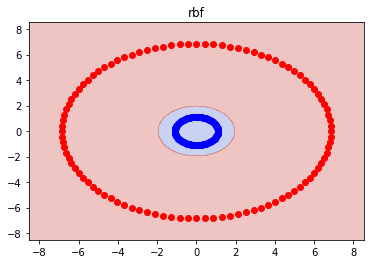

In [151]:
x1,y1 = ring(0,4)
x2,y2 = ring(6,10)
plt.plot(x1, y1, 'bo')
plt.plot(x2, y2, 'ro')
x = np.column_stack((np.concatenate((x1, x2)),
                         np.concatenate((y1, y2))))
y = np.hstack((np.zeros(100), np.ones(100)))
clf=svm.SVC(kernel='rbf', gamma=0.7).fit(x,y)

# Plot iris points
ax = plt.gca()
xlim=ax.get_xlim()
ylim=ax.get_ylim()
XX,YY = make_meshgrid(xlim,ylim)
# Plot boundaries
plot_contours(ax,clf,XX,YY,cmap=plt.cm.coolwarm, alpha=0.3)
plt.title(clf.kernel)
plt.show()

## Zad 4 Rozpoznawanie twarzy z zastosowaniem projekcji eigenfaces

In [37]:
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import accuracy_score
from collections import defaultdict

In [33]:
def classification_accuracy(labels,labels_dict,y_test,y_pred):
    print ('{: >17} {: >10}\n'.format('', 'accuracy'))
    for label in set(labels):
        name = labels_dict[label]
        accuracy = accuracy_score(y_test == label, y_pred == label)
        print ('{: >17} {: >10.2f}'.format(name, accuracy))

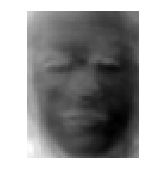

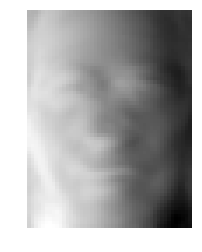

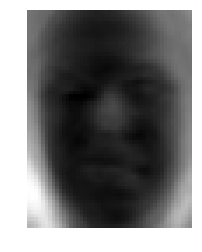

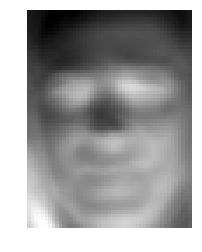

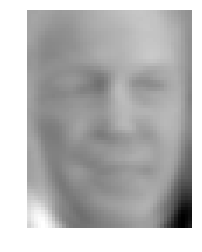

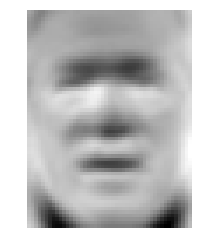

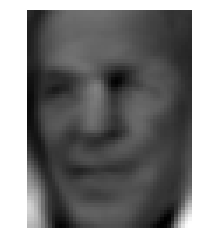

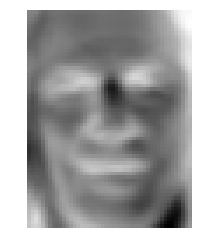

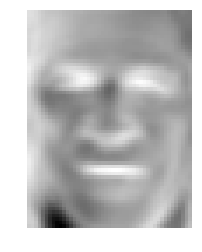

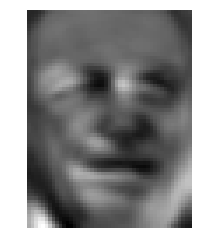

In [70]:
lfw = fetch_lfw_people(min_faces_per_person=70)
n_samples, h, w = lfw.images.shape
lfw_data,lfw_target = lfw.data,lfw.target
X_train, X_test, y_train, y_test = train_test_split(lfw_data, lfw_target, test_size=.25)
n_components = 150
pca = PCA(n_components=n_components,svd_solver='randomized',whiten=True).fit(X_train)

fig = plt.gcf()
fig.set_size_inches(2, 5)
eigenfaces = pca.components_.reshape((n_components, h, w))

for i in range(10):
    plt.axis('off')
    plt.imshow(eigenfaces[i], cmap=plt.get_cmap('gray'))
    plt.show()

Uwydatnione są głównie oczy usta oraz nos

In [ ]:
pca_x_train = pca.transform(X_train)
pca_x_test = pca.transform(X_test)

clf = svm.SVC(kernel='rbf', class_weight='balanced', C=1000.0, gamma=0.005)
clf.fit(pca_x_train, y_train)
y_pred = clf.predict(pca_x_test)
print(classification_report(y_test, y_pred, target_names=lfw.target_names))
print(classification_accuracy(lfw.target,lfw.target_names,y_test,y_pred))

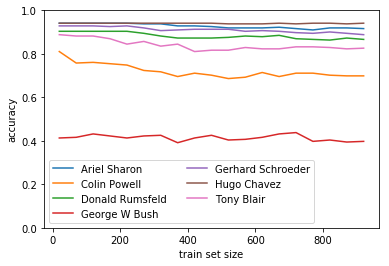

In [56]:
person_accuracies = defaultdict(list)
train_test_sizes = np.arange(20,len(y_train),50)
for train_test_size in train_test_sizes:
    clf = svm.SVC(kernel='rbf', class_weight='balanced', C=1000.0, gamma=0.005)
    clf.fit(pca_x_train[:train_test_size], y_train[:train_test_size])
    y_pred = clf.predict(pca_x_test)
    for person_label in set(lfw.target):
        name = lfw.target_names[person_label]
        accuracy = accuracy_score(y_test == person_label, y_pred == person_label)
        person_accuracies[name].append(accuracy)
for name, accuracies in person_accuracies.items():
    plt.plot(train_test_sizes, accuracies, '-', label=name)
plt.legend(ncol=2)
plt.ylabel('accuracy')
plt.xlabel('train set size')
plt.ylim(0, 1)
plt.show()